In [1]:
# Импорт библиотек (общий для всего ноутбука)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# Этап 1: Загрузка обработанных данных

In [2]:
# Пути к обработанным данным (адаптируйте, если нужно; предполагаем копию из ЛР1 в data/filtered)
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)  # Создаем папку, если нет

# Пути к файлам
filtered_anime_path = os.path.join(processed_dir, 'anime_processed.csv')
filtered_scores_path = os.path.join(processed_dir, 'users_score_processed.csv')
filtered_details_path = os.path.join(processed_dir, 'users_details_processed.csv')
filtered_merged_path = os.path.join(processed_dir, 'merged_scores_details.csv')

# Загрузка данных
anime_df = pd.read_csv(filtered_anime_path, parse_dates=['Aired'])
users_score_df = pd.read_csv(filtered_scores_path)
users_details_df = pd.read_csv(filtered_details_path, parse_dates=['Joined'])
merged_scores_details = pd.read_csv(filtered_merged_path, parse_dates=['Joined'])

print("Загружены обработанные данные:")
print("Anime DF shape:", anime_df.shape)
print("Users Score DF shape:", users_score_df.shape)
print("Users Details DF shape:", users_details_df.shape)
print("Merged DF shape:", merged_scores_details.shape)

Загружены обработанные данные:
Anime DF shape: (24718, 24)
Users Score DF shape: (24325191, 5)
Users Details DF shape: (731290, 16)
Merged DF shape: (24325191, 20)


# Этап 2: Изучение распределений признаков


## 2.1 Распределения в anime_df

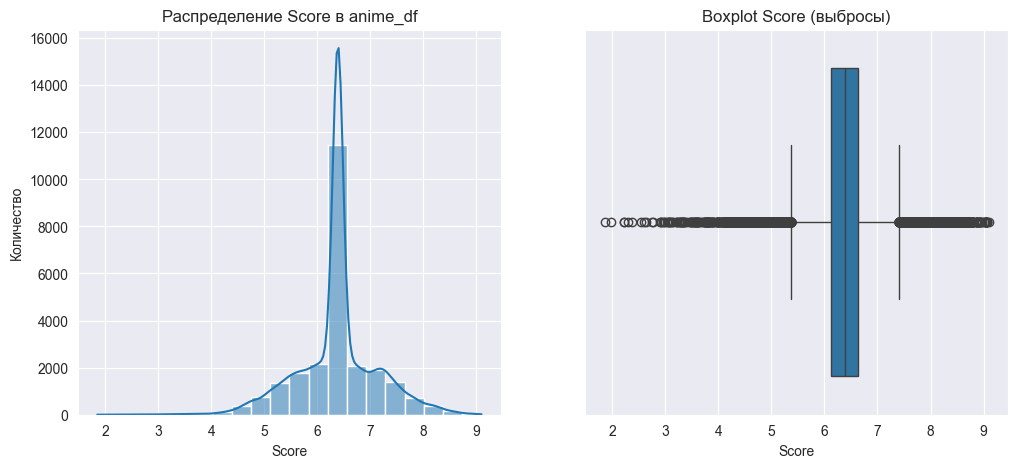

Тест нормальности для Score: stat=239.46, p-value=0.0000 (p<0.05 — не нормальное)


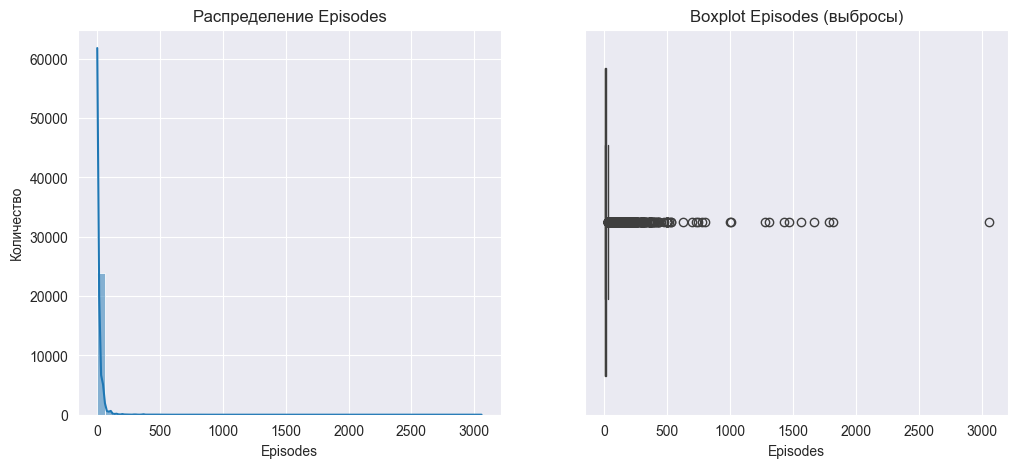

Тест нормальности для Episodes: stat=13213.36, p-value=0.0000


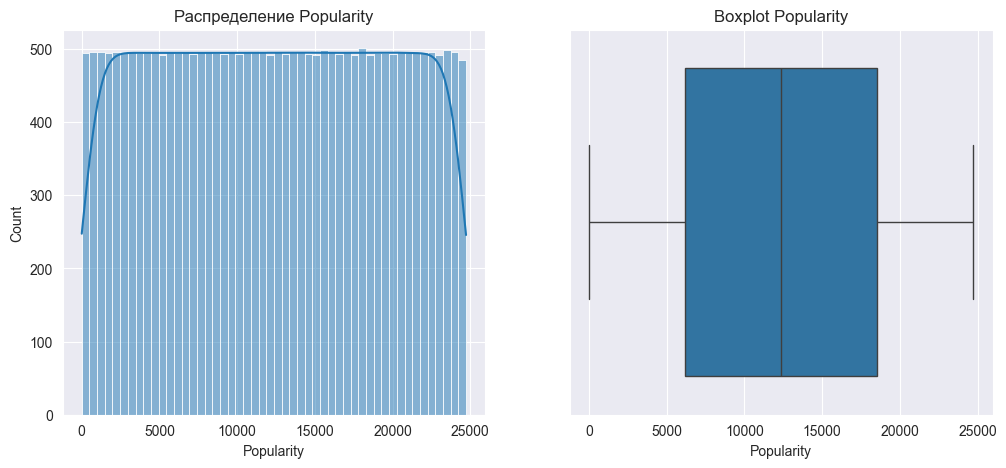

Тест нормальности для Popularity: stat=4287.52, p-value=0.0000


In [3]:
# Гистограмма и boxplot для Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(anime_df['Score'], bins=20, kde=True)
plt.title('Распределение Score в anime_df')
plt.xlabel('Score')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(x=anime_df['Score'])
plt.title('Boxplot Score (выбросы)')
plt.show()

score_sample = anime_df['Score'].sample(5000)
stat, p = stats.normaltest(score_sample)
print(f"Тест нормальности для Score: stat={stat:.2f}, p-value={p:.4f} (p<0.05 — не нормальное)")

# Аналогично для Episodes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(anime_df['Episodes'], bins=50, kde=True)
plt.title('Распределение Episodes')
plt.xlabel('Episodes')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(x=anime_df['Episodes'])
plt.title('Boxplot Episodes (выбросы)')
plt.show()

episodes_sample = anime_df['Episodes'].sample(5000)
stat, p = stats.normaltest(episodes_sample)
print(f"Тест нормальности для Episodes: stat={stat:.2f}, p-value={p:.4f}")

# Для Popularity (аналогично)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(anime_df['Popularity'], bins=50, kde=True)
plt.title('Распределение Popularity')

plt.subplot(1, 2, 2)
sns.boxplot(x=anime_df['Popularity'])
plt.title('Boxplot Popularity')
plt.show()

popularity_sample = anime_df['Popularity'].sample(5000)
stat, p = stats.normaltest(popularity_sample)
print(f"Тест нормальности для Popularity: stat={stat:.2f}, p-value={p:.4f}")

## 2.2 Распределения в users_score_df и users_details_df

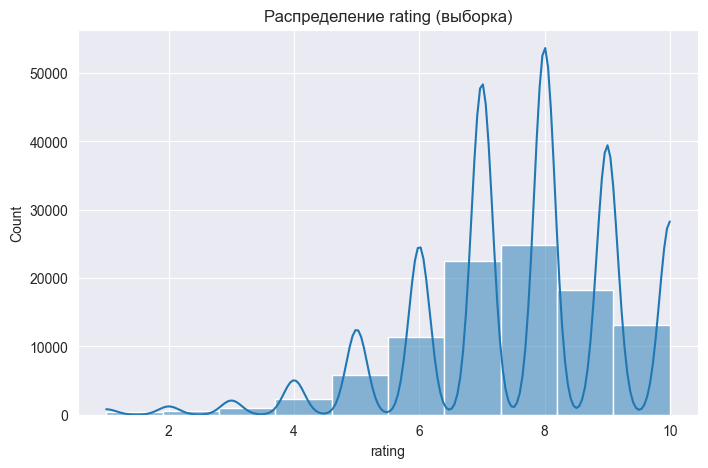

Тест нормальности для rating: stat=9098.31, p-value=0.0000


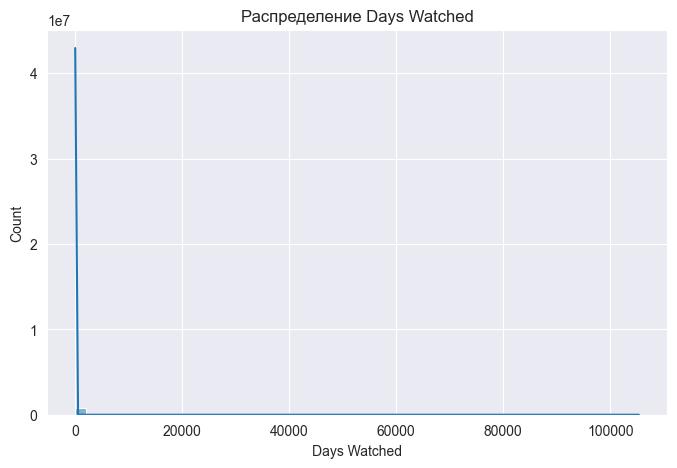

Тест нормальности для Days Watched: stat=5689.02, p-value=0.0000


In [4]:
# Гистограмма для rating в users_score_df (на выборке, т.к. большой DF)
sample_rating = users_score_df['rating'].sample(100000)
plt.figure(figsize=(8, 5))
sns.histplot(sample_rating, bins=10, kde=True)
plt.title('Распределение rating (выборка)')
plt.show()

stat, p = stats.normaltest(sample_rating)
print(f"Тест нормальности для rating: stat={stat:.2f}, p-value={p:.4f}")

# Для Days Watched в users_details_df
plt.figure(figsize=(8, 5))
sns.histplot(users_details_df['Days Watched'], bins=50, kde=True)
plt.title('Распределение Days Watched')
plt.show()

days_sample = users_details_df['Days Watched'].sample(5000)
stat, p = stats.normaltest(days_sample)
print(f"Тест нормальности для Days Watched: stat={stat:.2f}, p-value={p:.4f}")

## 2.3 Распределения в merged_scores_details

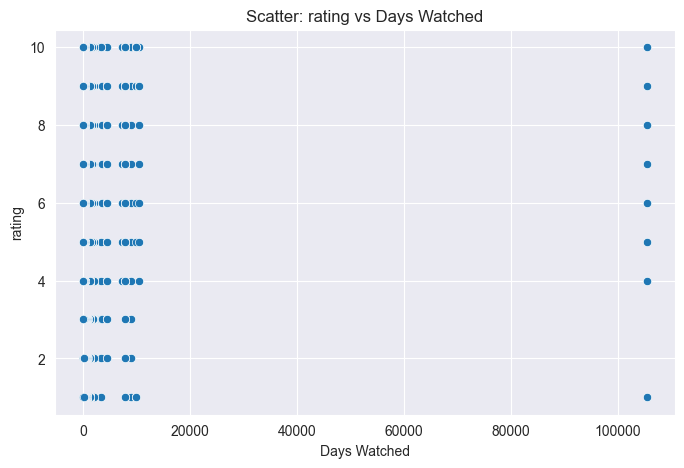

In [10]:
# Scatter plot: rating vs Days Watched (на выборке)
# sample_merged = merged_scores_details.sample(100000)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Days Watched', y='rating', data=merged_scores_details)
plt.title('Scatter: rating vs Days Watched')
plt.show()

# Этап 3: Корреляционный анализ

## 3.1 Корреляции в anime_df

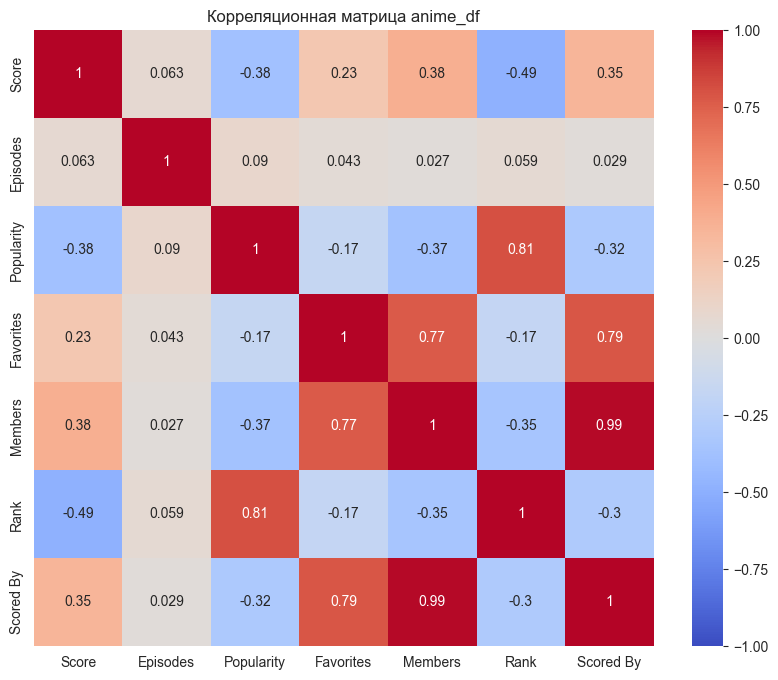

In [6]:
# Числовые колонки
num_cols_anime = ['Score', 'Episodes', 'Popularity', 'Favorites', 'Members', 'Rank', 'Scored By']
corr_matrix_anime = anime_df[num_cols_anime].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_anime, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица anime_df')
plt.show()


## 3.2 Корреляции в users_details_df и merged

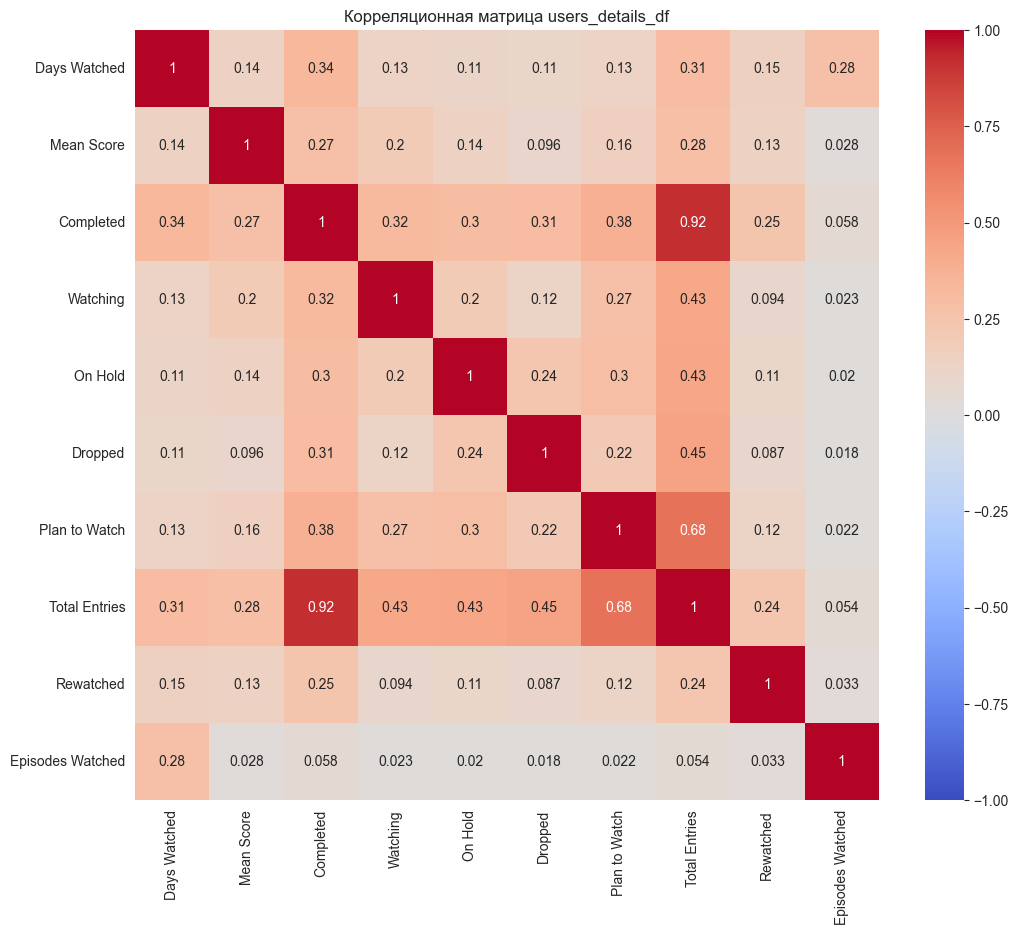

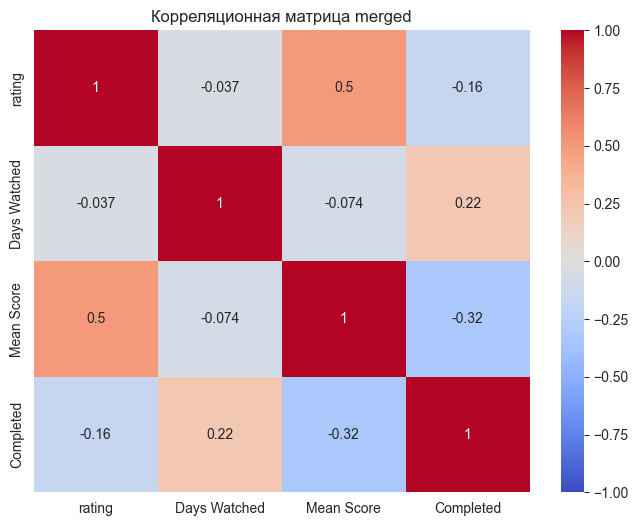

In [13]:
# Числовые колонки в users_details_df
num_cols_details = ['Days Watched', 'Mean Score', 'Completed', 'Watching', 'On Hold', 'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched']
corr_matrix_details = users_details_df[num_cols_details].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_details, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица users_details_df')
plt.show()

# В merged: rating vs user stats (на выборке)
corr_matrix_merged = merged_scores_details[['rating', 'Days Watched', 'Mean Score', 'Completed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_merged, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица merged')
plt.show()

# Комментарий: Сильная корреляция Days Watched vs Episodes Watched (логично). Слабая корреляция rating vs Mean Score (пользователи с высоким средним дают похожие оценки).

# Этап 4: Поиск закономерностей

## 4.1 Временные паттерны в anime_df (по Aired)

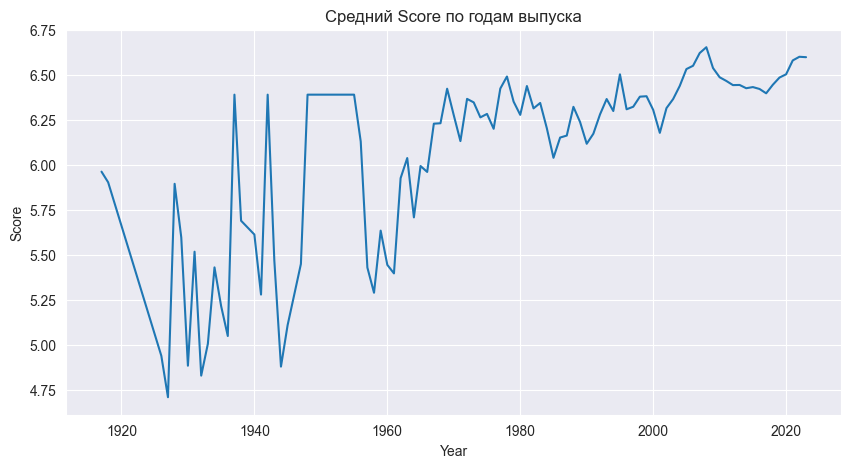

In [8]:
anime_df['Year'] = anime_df['Aired'].dt.year
# Группировка среднего Score по годам
year_score = anime_df.groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Score', data=year_score)
plt.title('Средний Score по годам выпуска')
plt.show()

## 4.2 Временные паттерны в users_details_df (по Joined)

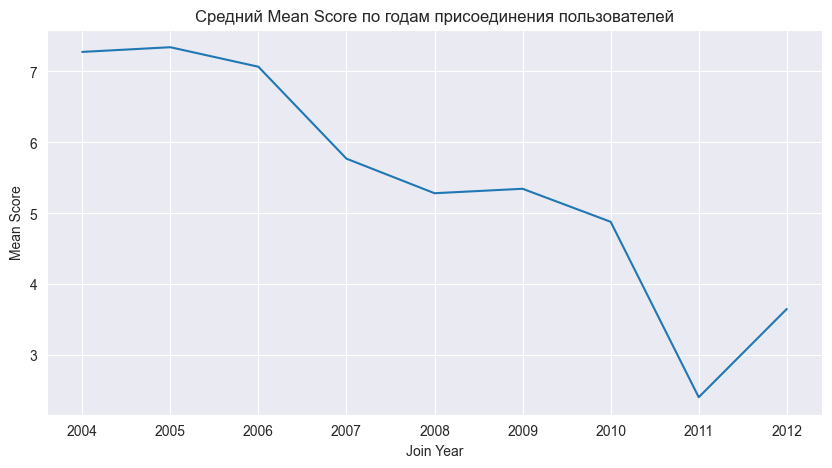

In [9]:
users_details_df['Join Year'] = users_details_df['Joined'].dt.year
year_mean_score = users_details_df.groupby('Join Year')['Mean Score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Join Year', y='Mean Score', data=year_mean_score)
plt.title('Средний Mean Score по годам присоединения пользователей')
plt.show()